In [26]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [27]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [28]:
n_train=30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [29]:
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

In [31]:
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.967, Test: 0.800


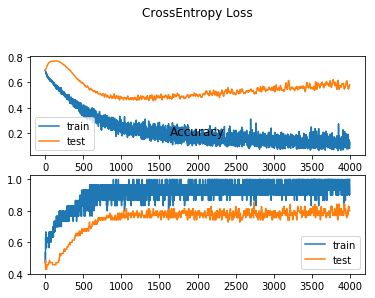

In [32]:
# Loss curves
pyplot.subplot(211)
pyplot.title('CrossEntropy Loss', pad=40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

#accuracy curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()

pyplot.show()